# Double layer NN for XOR (Lab 09-2 in HunKim)

In [1]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [2]:
# input & output
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 1st layer
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# 2nd layer
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [3]:
# cost/loss function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1 - Y)*tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [4]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [22]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 0.753902 [array([[ 0.7988674 ,  0.6801188 ],
       [-1.21986341, -0.30361032]], dtype=float32), array([[ 1.37522972],
       [-0.78823847]], dtype=float32)]
1000 0.671229 [array([[ 1.15745616,  0.70470023],
       [-1.85447979, -0.1528109 ]], dtype=float32), array([[ 1.38862824],
       [-0.87442583]], dtype=float32)]
2000 0.533936 [array([[ 3.05309701,  1.38850832],
       [-3.45586586, -0.65311342]], dtype=float32), array([[ 3.28347397],
       [-1.56185901]], dtype=float32)]
3000 0.197867 [array([[ 4.62342453,  3.50294876],
       [-4.75216293, -3.03614497]], dtype=float32), array([[ 5.56490564],
       [-4.34472466]], dtype=float32)]
4000 0.0776533 [array([[ 5.28239202,  4.63241005],
       [-5.36364794, -4.27421331]], dtype=float32), array([[ 7.05860186],
       [-6.29910707]], dtype=float32)]
5000 0.0453608 [array([[ 5.61032104,  5.15951157],
       [-5.69579315, -4.82549715]], dtype=float32), array([[ 7.97181797],
       [-7.34886265]], dtype=float32)]
6000 0.0315366 [array([

# The XOR example from Python Machine Learning

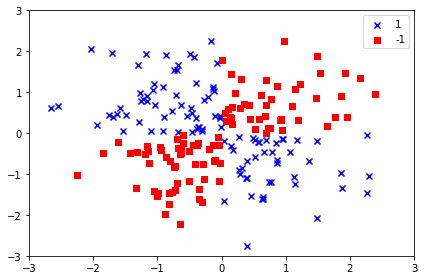

In [23]:
import matplotlib.pyplot as plt

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

In [44]:
x_data = X_xor.tolist()
y_data = np.expand_dims((y_xor>0)+0.0,1).tolist()

In [55]:
# cost/loss function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1 - Y)*tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(50001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 4000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
            
    print( sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) )
    y_pred = sess.run(predicted, feed_dict={X: x_data, Y: y_data})

0 0.786101 [array([[ 0.80023456,  0.67967117],
       [-1.21406353, -0.30628094]], dtype=float32), array([[ 1.35795116],
       [-0.79406995]], dtype=float32)]
4000 0.452201 [array([[ 2.44478774,  2.42860603],
       [-2.38669181, -2.71319151]], dtype=float32), array([[ 5.40043449],
       [-5.22545767]], dtype=float32)]
8000 0.448991 [array([[ 2.22748923,  2.01612997],
       [-2.19597602, -2.18916035]], dtype=float32), array([[ 6.30235243],
       [-6.0452013 ]], dtype=float32)]
12000 0.447605 [array([[ 2.06242347,  1.80836213],
       [-2.03425217, -1.94648755]], dtype=float32), array([[ 6.87085056],
       [-6.68627262]], dtype=float32)]
16000 0.446815 [array([[ 1.94861114,  1.6832037 ],
       [-1.92254269, -1.80369246]], dtype=float32), array([[ 7.32387352],
       [-7.19328451]], dtype=float32)]
20000 0.446305 [array([[ 1.86759424,  1.59774518],
       [-1.84343207, -1.7072283 ]], dtype=float32), array([[ 7.70492935],
       [-7.60847139]], dtype=float32)]
24000 0.445948 [array(

In [53]:
y_pred = np.squeeze(y_pred)

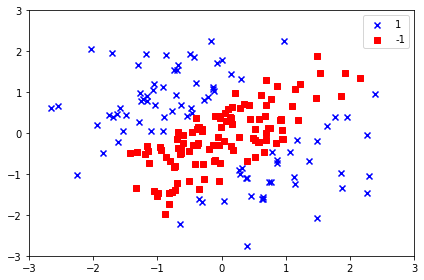

In [54]:
plt.scatter(X_xor[y_pred == 1, 0],
            X_xor[y_pred == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_pred == 0, 0],
            X_xor[y_pred == 0, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()